<a href="https://colab.research.google.com/github/1912-khushi/GRIPJULY21/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation #GRIPJULY21**

**TASK1**:**Prediction using Supervised ML**

**AUTHOR**: **Khushi Kantula**

**Predict the percentage of a student based on the number of study hours**

**What will be the predicted score if a student studies for 9.25 hrs/day**

Dataset-(https://bit.ly/w-data)





***Importing*** ***Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

***Importing The Dataset***

In [2]:
dataset=pd.read_csv('w-data[1]')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.shape

(25, 2)

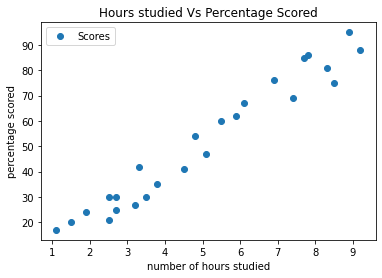

In [4]:
#plotting the distibution of scores
dataset.plot(x='Hours',y='Scores',style='o')
plt.title("Hours studied Vs Percentage Scored")
plt.xlabel("number of hours studied")
plt.ylabel("percentage scored")
plt.show()

***Preparing the Data***

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [6]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [7]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [8]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


***spitting dataset into training set and test set***

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [11]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [13]:
print(y_test)

[20 27 69 30 62]


***Training the simple linear regresson model on the training set***

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Predicting the results***

In [15]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***Visualising the training set results***

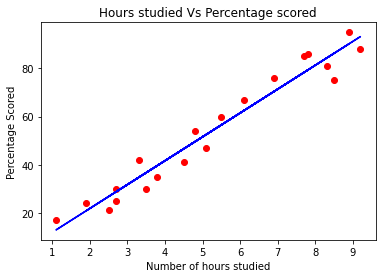

In [17]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("Hours studied Vs Percentage scored")
plt.xlabel("Number of hours studied")
plt.ylabel("Percentage Scored")
plt.show()

***Visualising the test set results***

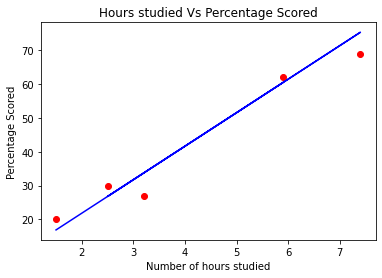

In [18]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title('Hours studied Vs Percentage Scored')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage Scored')
plt.show()

***What will be predicted score if a student studies for 9.25 hrs/day?***

In [19]:
hours=[9.25]
given_pred=regressor.predict([hours])
print("no of hours={}".format(hours))
print("predicted Score={}".format(given_pred[0]))

no of hours=[9.25]
predicted Score=93.69173248737539


***Model Evaluation***

In [20]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))



Mean Absolute Error: 4.183859899002982


***Getting final linear regression equation with the value of the coefficient***

In [21]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434662


**Percentage Scored** = 9.91065648 * **No.of hours studied** + 2.018160041434662